In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv', 'train_images', 'test_images']


In [39]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
sample=pd.read_csv("../input/sample_submission.csv")

In [40]:
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

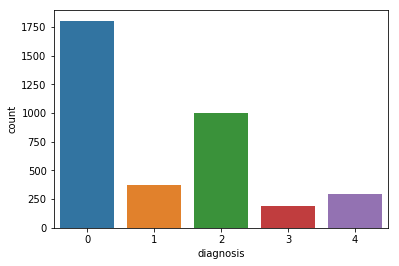

In [42]:
sns.countplot(x='diagnosis',data=train)



    0 - No DR

    1 - Mild

    2 - Moderate

    3 - Severe

    4 - Proliferative DR


#### Image Handling


In [43]:
import cv2
import glob

X_data = []
images = glob.glob ("../input/train_images/*.png")


In [44]:
images[0:5]

['../input/train_images/0c43c79e8cfb.png',
 '../input/train_images/cd01672507c9.png',
 '../input/train_images/3f73c91b7e32.png',
 '../input/train_images/8bc6716c2238.png',
 '../input/train_images/3abac0961bfd.png']

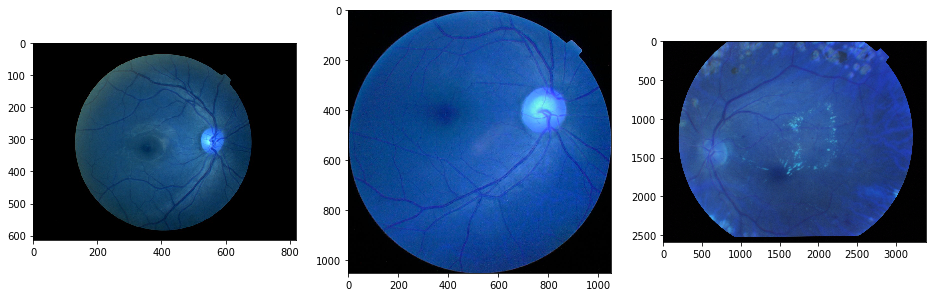

In [45]:
import random
r = random.sample(images, 3)
r

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))

##### wow our eyes are really beautiful :P

### I'll update this kernel soon :)

#### Image path

In [46]:
train_image_path = '../input/train_images/'
test_image_path = '../input/test_images/'

In [47]:
X=[]
Z=[]
IMG_SIZE=150
ＴＲＡＩＮ_ＩＭＡＧＥ_DIR='../input/train_images/'

def assign_label(img, diagnosis):
    return diagnosis

def make_train_data(train, DIR):
    for img in tqdm(os.listdir(DIR)):
        #print(img)
        label = assign_label(img, train[train['id_code']==img.strip('.png')]['diagnosis'].values)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if not img is None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        else:
            print('None image file : ', path)
            continue

        X.append(np.array(img))
        Z.append(str(label))

In [48]:
from tqdm import tqdm

In [49]:
make_train_data(train, ＴＲＡＩＮ_ＩＭＡＧＥ_DIR)
print("total images: ", len(X))
print("image size: ", X[0].shape)

100%|██████████| 3662/3662 [04:10<00:00, 14.60it/s]

total images:  3662
image size:  (150, 150, 3)


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
num_classes = 5
le = LabelEncoder()
Y = le.fit_transform(Z)

In [52]:
from keras.utils import to_categorical

In [53]:
Y = to_categorical(Y)
X = np.array(X)
X = X/255

In [54]:
from keras.preprocessing.image import ImageDataGenerator

In [55]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        horizontal_flip=True, 
        vertical_flip=False)  


datagen.fit(X)

#### Modelling


In [56]:
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop

In [57]:
from keras.layers import Dropout, Flatten, Activation, Lambda
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf

In [58]:
_input = Input(shape=(150, 150, 3))
x = Lambda(lambda image: tf.image.resize_images(image, (224, 224)))(_input)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(x)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(conv1)
pool1 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block1_pool')(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(pool1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(conv3)
pool2 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block2_pool')(conv4)

conv5 = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(pool2)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(conv5)
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(conv6)
pool3 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block3_pool')(conv7)

conv8 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(pool3)
conv9 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(conv8)
conv10 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(conv9)
pool4 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block4_pool')(conv10)

conv11 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(pool4)
conv12 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(conv11)
conv13 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(conv12)
pool5 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block5_pool')(conv13)

flat = Flatten(name='flatten')(pool5)
dense1 = Dense(4096, activation='relu', name='fc1')(flat)
dropout1 = Dropout(0.5, name='dropout1')(dense1)
dense2 = Dense(4096, activation='relu', name='fc2')(dropout1)
dropout2 = Dropout(0.5, name='dropout2')(dense2)
output = Dense(num_classes, activation='softmax', name='output')(dropout2)

In [59]:
import keras
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model  = Model(inputs=_input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________

In [60]:
model.fit(X,Y,batch_size=128,epochs=50,verbose=2)

Epoch 1/50
 - 29s - loss: 6.1903 - acc: 0.4451
Epoch 2/50
 - 26s - loss: 1.3496 - acc: 0.4869
Epoch 3/50
 - 26s - loss: 1.0760 - acc: 0.5410
Epoch 4/50
 - 26s - loss: 0.9833 - acc: 0.6532
Epoch 5/50
 - 26s - loss: 0.9115 - acc: 0.6841
Epoch 6/50
 - 26s - loss: 0.8641 - acc: 0.6999
Epoch 7/50
 - 26s - loss: 0.8513 - acc: 0.7010
Epoch 8/50
 - 26s - loss: 0.8449 - acc: 0.7092
Epoch 9/50
 - 26s - loss: 0.8444 - acc: 0.7007
Epoch 10/50
 - 26s - loss: 0.7971 - acc: 0.7157
Epoch 11/50
 - 26s - loss: 0.8127 - acc: 0.7116
Epoch 12/50
 - 26s - loss: 0.7823 - acc: 0.7190
Epoch 13/50
 - 26s - loss: 0.7796 - acc: 0.7220
Epoch 14/50
 - 26s - loss: 0.7755 - acc: 0.7204
Epoch 15/50
 - 26s - loss: 0.7592 - acc: 0.7236
Epoch 16/50
 - 26s - loss: 0.7667 - acc: 0.7256
Epoch 17/50
 - 26s - loss: 0.7786 - acc: 0.7138
Epoch 18/50
 - 26s - loss: 0.7340 - acc: 0.7332
Epoch 19/50
 - 26s - loss: 0.7172 - acc: 0.7452
Epoch 20/50
 - 26s - loss: 0.7185 - acc: 0.7425
Epoch 21/50
 - 26s - loss: 0.6848 - acc: 0.7553
E

### Preparing test data

In [61]:
test_X=[]
test_Z=[]
IMG_SIZE=150
ＴEST_ＩＭＡＧＥ_DIR='../input/test_images/'

def make_test_data(DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if not img is None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        else:
            print('None image file : ', path)
            continue

        test_X.append(np.array(img))

In [62]:
make_test_data(ＴEST_ＩＭＡＧＥ_DIR)

100%|██████████| 1928/1928 [00:46<00:00, 41.70it/s]


In [63]:
test_X = np.array(test_X)
test_X = test_X/255

### Predicting

In [64]:
preds = model.predict(test_X).round(1).astype(int) 

In [65]:
df = pd.DataFrame(preds)

#### Error Here

In [66]:
df.head()

,0,1,2,3,4
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,1,0,0


##### Resolved by: @snakayama

In [75]:
preds1 = model.predict(test_X)
preds_max = np.argmax(preds1,axis = 1)
sample['diagnosis']= preds_max

##### Resolved by: @snakayama

#### After this just submission file :)

In [76]:
sample.head(300)

,id_code,diagnosis
0,0005cfc8afb6,2
1,003f0afdcd15,0
2,006efc72b638,3
3,00836aaacf06,1
4,009245722fa4,2
5,009c019a7309,2
6,010d915e229a,0
7,0111b949947e,2
8,01499815e469,4
9,0167076e7089,2


In [77]:
sample.to_csv('submission.csv',index=False)

##### https://www.kaggle.com/snakayama/instant-eda-and-vgg16
check this kernel for more details